In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = './Depression Dataset.csv'  # Replace with actual path
df = pd.read_csv(file_path)
print(f'Dataset Shape: {df.shape}')
df.head()

Dataset Shape: (604, 31)


,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,...,Yes,No,No,No,No,No,No,Yes,No,0
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,Yes,No,No,1
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,0
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,...,Yes,Yes,No,Yes,No,No,No,No,No,1
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,...,Yes,Yes,No,No,No,No,Yes,Yes,No,1


In [3]:
# Preprocessing: Encode categorical columns and scale features
X = df.drop(columns=['DEPRESSED'])  # Exclude target column
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = LabelEncoder().fit_transform(X[column])

In [4]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Determine optimal number of clusters using the elbow method
inertias = []
K = range(2, 11)

In [6]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

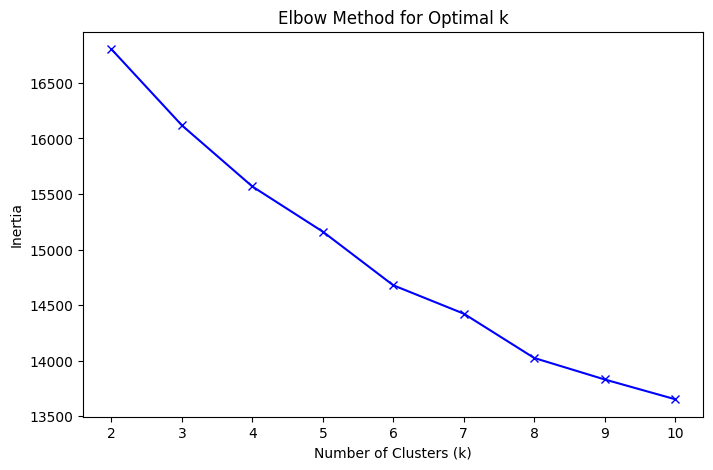

In [7]:
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
# Fit K-Means with optimal k (assume k=3 based on elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [9]:
# Add cluster labels to the original dataset
df['Cluster'] = clusters

In [10]:
# Analyze cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

In [11]:
print("\nDistinctive features for each cluster:")
for i in range(len(cluster_centers)):
    print(f"\nCluster {i}:")
    sorted_features = cluster_centers.iloc[i].sort_values()
    print("Highest values:")
    print(sorted_features[-5:])
    print("\nLowest values:")
    print(sorted_features[:5])


Distinctive features for each cluster:

Cluster 0:
Highest values:
PREMED     0.561654
DRINK      0.667712
ILLNESS    0.696286
SMOKE      0.825887
AGERNG     1.506361
Name: 0, dtype: float64

Lowest values:
PROF      -1.947400
MARSTS    -0.943490
RESDPL    -0.497988
SUICIDE   -0.262546
CHEAT     -0.260426
Name: 0, dtype: float64

Cluster 1:
Highest values:
RESDPL    0.102357
MARSTS    0.112815
POSSAT    0.203394
PROF      0.223007
ENVSAT    0.271141
Name: 1, dtype: float64

Lowest values:
DEPRI    -0.388618
INFER    -0.383825
CHEAT    -0.345364
ABUSED   -0.304625
ANXI     -0.304106
Name: 1, dtype: float64

Cluster 2:
Highest values:
SUICIDE    0.637105
ABUSED     0.642223
DEPRI      0.684645
INFER      0.792633
CHEAT      0.800055
Name: 2, dtype: float64

Lowest values:
ENVSAT   -0.500759
POSSAT   -0.427042
GENDER   -0.174781
AGERNG   -0.142805
LIVWTH   -0.125159
Name: 2, dtype: float64


In [12]:
# Compare clusters with actual target variable
if 'DEPRESSED' in df.columns:
    contingency_table = pd.crosstab(df['Cluster'], df['DEPRESSED'])
    print("\nContingency Table (Clusters vs Actual Labels):")
    print(contingency_table)


Contingency Table (Clusters vs Actual Labels):
DEPRESSED    0    1
Cluster            
0           18   51
1          189  169
2            0  177


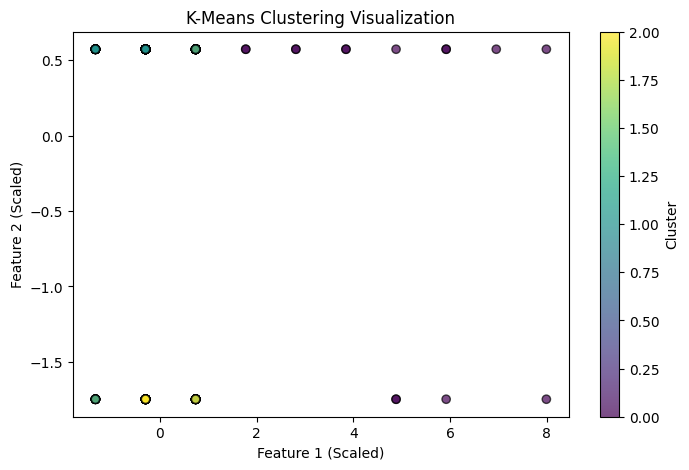

In [13]:
# Visualize the clusters using the first two features
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()